In [1]:
import ee
import folium 
# import geehydro
import numpy as np # yes, numpy!
import pandas as pd # yes, pandas!
import proplot as plot 
import matplotlib.pyplot as plt 
from ipygee import*
from pandas.plotting import register_matplotlib_converters
# Making module or packages collection attribute became callable..
import collections
collections.Callable = collections.abc.Callable

In [2]:
ee.Initialize()#allowing access or configuration  
print("Connection established successfully!!!")

Connection established successfully!!!


In [3]:
import geemap

In [4]:
xingu = ee.FeatureCollection("users/MosongJrn/KSA_Study_Area_Projected0")

In [5]:
Map=geemap.Map()

In [6]:
# Map = folium.Map(location=[-12., -52.5], zoom_start=8)
Map.addLayer(xingu,{},"sxingu")
Map.centerObject(xingu, 11)
Map

Map(center=[-0.3952390277262099, 36.91824938438169], controls=(WidgetControl(options=['position', 'transparent…

In [7]:
# MODIS MOD13Q1
modis = ee.ImageCollection('MODIS/006/MOD13Q1')
modis = modis.filterDate(ee.DateRange('2016-01-01','2019-12-01'))


In [8]:
# select EVI and NDVI
evi = modis.select('EVI')
ndvi = modis.select('NDVI')

In [9]:
def scale_factor(image):
# scale factor for the MODIS MOD13Q1 product
 return image.multiply(0.0001).copyProperties(image, 
                                             ['system:time_start'])
# mapping function to multiply by the scale factor
scaled_evi = evi.map(scale_factor)
scaled_ndvi = ndvi.map(scale_factor)

In [21]:
scaled_evi.plot()

AttributeError: 'ImageCollection' object has no attribute 'plot'

In [10]:
Map.addLayer(scaled_ndvi.mean().clip(xingu),
                  vis_params={'min': 0,
                              'max': 1,
                              'palette': ['red', 'yellow','green']})
Map

Map(center=[-0.3952390277262099, 36.91824938438169], controls=(WidgetControl(options=['position', 'transparent…

In [11]:
# Xingu MOD13Q1 NDVI time series
xingu_ndvi = chart.Image.series(**{'imageCollection': scaled_ndvi,
                                   'region': xingu,
                                   'reducer': ee.Reducer.mean(),
                                   'scale': 1000,
                                   'xProperty': 'system:time_start'})
xingu_ndvi.renderWidget(width='50%')

HTML(value='<embed src=data:image/svg+xml;charset=utf-8;base64,PD94bWwgdmVyc2lvbj0nMS4wJyBlbmNvZGluZz0ndXRmLTg…

In [12]:
# Xingu MOD13Q1 NDVI time series
xingu_evi = chart.Image.series(**{'imageCollection': scaled_evi,
                                   'region': xingu,
                                   'reducer': ee.Reducer.mean(),
                                   'scale': 1000,
                                   'xProperty': 'system:time_start'})
xingu_evi.renderWidget(width='50%')

HTML(value='<embed src=data:image/svg+xml;charset=utf-8;base64,PD94bWwgdmVyc2lvbj0nMS4wJyBlbmNvZGluZz0ndXRmLTg…

In [13]:
import pandas

In [14]:
type(xingu_ndvi.dataframe)
pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

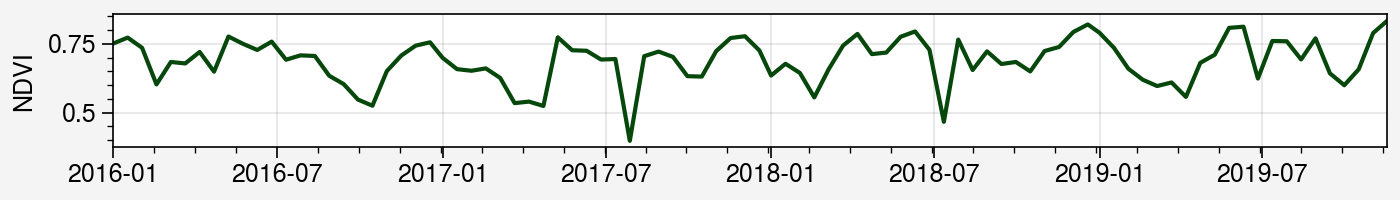

In [18]:
fig, ax = plot.subplots(figsize=(7, 1), tight=True)
ax.plot(xingu_ndvi.dataframe.index, xingu_ndvi.dataframe['NDVI'],
        color='forest green')
plot.show()

In [16]:
# monthly averaging
xingu_evi_monthly = xingu_evi.dataframe.groupby(pd.Grouper(freq="M")).mean()
xingu_ndvi_monthly = xingu_ndvi.dataframe.groupby(pd.Grouper(freq="M")).mean()

KeyError: 'NDVI'

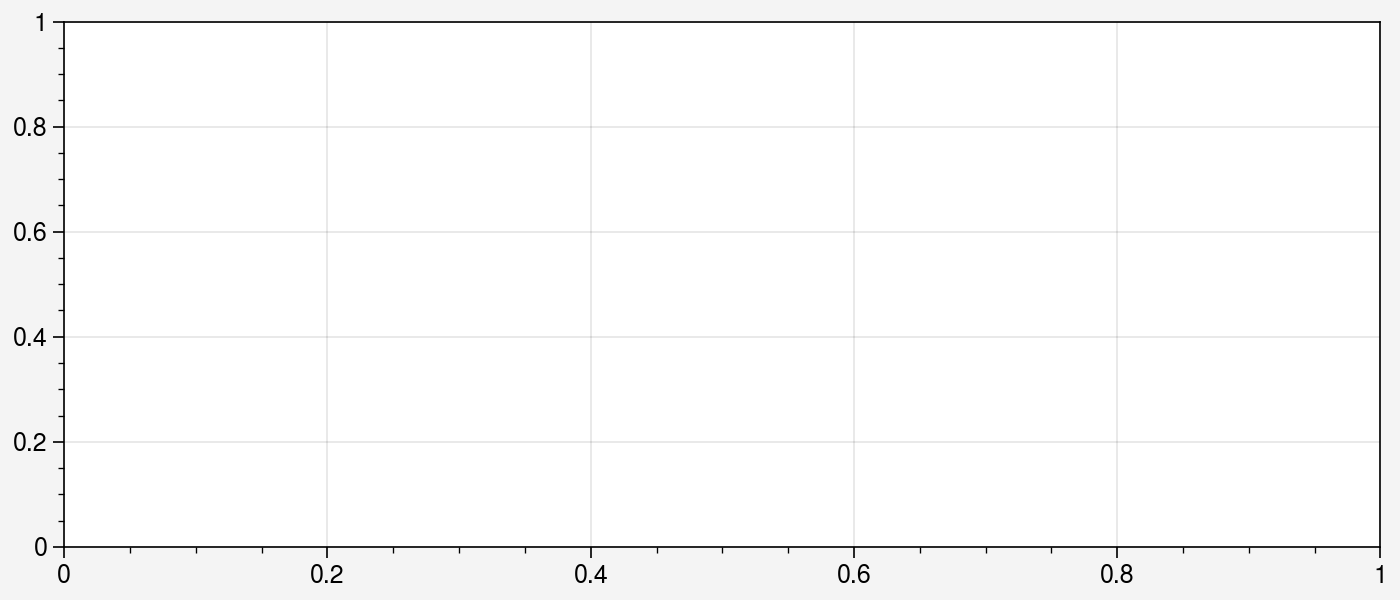

In [17]:
fig, ax = plot.subplots(figsize=(7, 3), tight=True)
ax.plot(xingu_evi.dataframe.index, xingu_evi.dataframe['NDVI'],
        color='forest green', marker='o')
plot.show()

In [ ]:
# time index
time = xingu_evi_monthly.index
# plot
fig, ax1 = plt.subplots(figsize=(7, 3))
ax2 = ax1.twinx()
# EVI
ax1.plot(time, xingu_evi_monthly, label='EVI',
         color='muddy brown', marker='+')
# NDVI
ax2.plot(time, xingu_ndvi_monthly, label='NDVI',
         color='forest green', marker='o')
ax1.set_xlabel('Time')
ax1.set_ylabel('EVI')
ax2.set_ylabel('NDVI')
ax1.set_yticks(np.arange(0.3, 1.1, 0.1))
ax2.set_yticks(np.arange(0.3, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()